## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





#### Github Link

https://github.com/naomialido/CPSC4800_A3.3

#### Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Load dataset

In [9]:
current_dir = os.getcwd()
housePrices = pd.read_csv('../Data/train.csv')
housePrices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Inspect Data

In [11]:
#display data types
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
#check number of variables and observances
observations, features = housePrices.shape
print(f"Number of observations: {observations}")
print(f"Number of features: {features}")


Number of observations: 1460
Number of features: 81


In [13]:
#check statistics summary without id
housePrices.describe().iloc[:, 1:]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Check Missing Values and Drop Rows with Missing Values

In [15]:
#check for missing values per column
missing_values = housePrices.isnull().sum()
print(missing_values[missing_values > 0])


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [16]:
#drop rows with missing values
housePrices.dropna()
print(housePrices.isnull().sum() > 0)


Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


#### Data Distribution

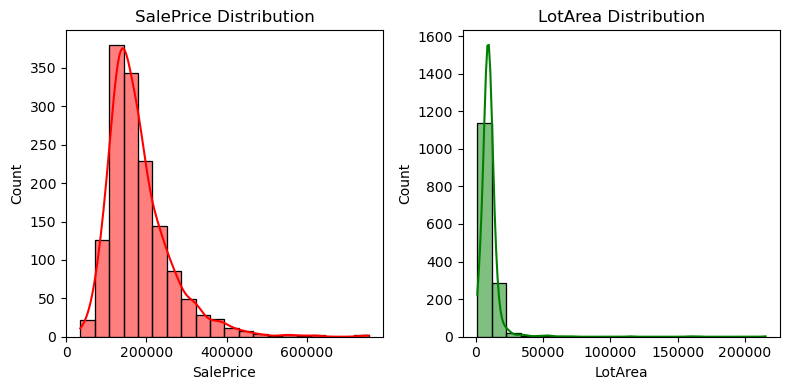

In [18]:
#data distribution for 2 numerical vars (including dependent var)
#create histogram for house sale price
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(housePrices['SalePrice'], kde=True, bins=20, color='red', edgecolor='black')
plt.title('SalePrice Distribution')

#create histogram for lot area and show them side-by-side
plt.subplot(1, 2, 2)
sns.histplot(housePrices['LotArea'], kde=True, bins=20, color='green', edgecolor='black')
plt.title('LotArea Distribution')

plt.tight_layout() #fits subplots cleanly
plt.savefig('../Results/quantitativeDist.png')
plt.show()


C:\Users\volca\AppData\Local\Temp\ipykernel_14256\1201009198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=housePrices, x='HouseStyle', palette='viridis')
C:\Users\volca\AppData\Local\Temp\ipykernel_14256\1201009198.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=housePrices, x='Foundation', palette='dark')


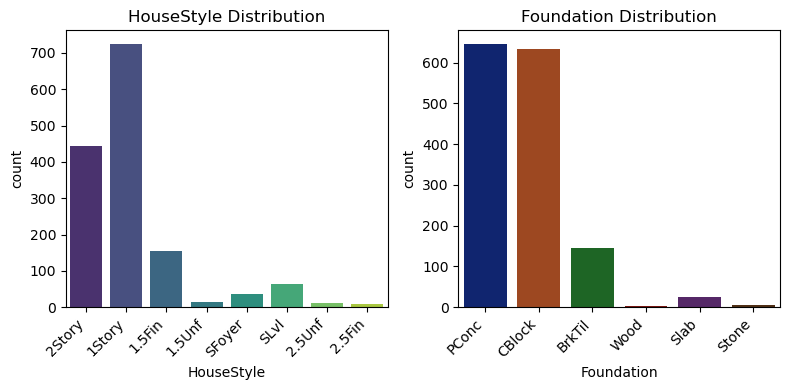

In [19]:
#data distribution for 2 categorical vars

plt.figure(figsize=(8, 4))

#countplot for housestyle
plt.subplot(1, 2, 1)
sns.countplot(data=housePrices, x='HouseStyle', palette='viridis')
plt.title('HouseStyle Distribution')
plt.xticks(rotation=45, ha='right')

#countplot for foundation
plt.subplot(1, 2, 2)
sns.countplot(data=housePrices, x='Foundation', palette='dark')
plt.title('Foundation Distribution')
plt.xticks(rotation=45, ha='right')


plt.tight_layout() #fits subplots cleanly
plt.savefig('../Results/qualitativeDist.png')
plt.show()


#### Exploring Relationships

In [21]:
#create a list of selected columns for correlation heatmap
selected_columns =  ['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'MiscVal', 'SalePrice']
correlation = housePrices[selected_columns].corr()
print(correlation)

               LotArea  OverallCond  YearBuilt  TotalBsmtSF  1stFlrSF  \
LotArea       1.000000    -0.005636   0.014228     0.260833  0.299475   
OverallCond  -0.005636     1.000000  -0.375983    -0.171098 -0.144203   
YearBuilt     0.014228    -0.375983   1.000000     0.391452  0.281986   
TotalBsmtSF   0.260833    -0.171098   0.391452     1.000000  0.819530   
1stFlrSF      0.299475    -0.144203   0.281986     0.819530  1.000000   
TotRmsAbvGrd  0.190015    -0.057583   0.095589     0.285573  0.409516   
GarageArea    0.180403    -0.151521   0.478954     0.486665  0.489782   
MiscVal       0.038068     0.068777  -0.034383    -0.018479 -0.021096   
SalePrice     0.263843    -0.077856   0.522897     0.613581  0.605852   

              TotRmsAbvGrd  GarageArea   MiscVal  SalePrice  
LotArea           0.190015    0.180403  0.038068   0.263843  
OverallCond      -0.057583   -0.151521  0.068777  -0.077856  
YearBuilt         0.095589    0.478954 -0.034383   0.522897  
TotalBsmtSF       0.2

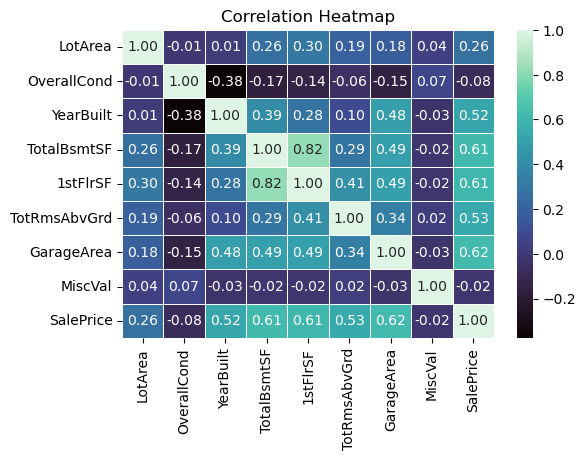

In [22]:
#create correlation heatmap using correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, 
            cmap='mako',  
            annot=True, #displays numbers on heatmap
            fmt='.2f', #format to 2 decimal places
            linewidths=0.5, #line between cells
            cbar=True) #show color gradient

plt.title('Correlation Heatmap')
plt.savefig('../Results/corrHeatmap.png')
plt.show()

In [23]:
#aggregate by neighborhood type and sale price with mean
avg_sale_price_by_neighborhood = housePrices.groupby('Neighborhood')['SalePrice'].mean()
print(avg_sale_price_by_neighborhood)


Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64


C:\Users\volca\AppData\Local\Temp\ipykernel_14256\961724341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sale_price_by_neighborhood.index, y=avg_sale_price_by_neighborhood.values, palette='plasma')


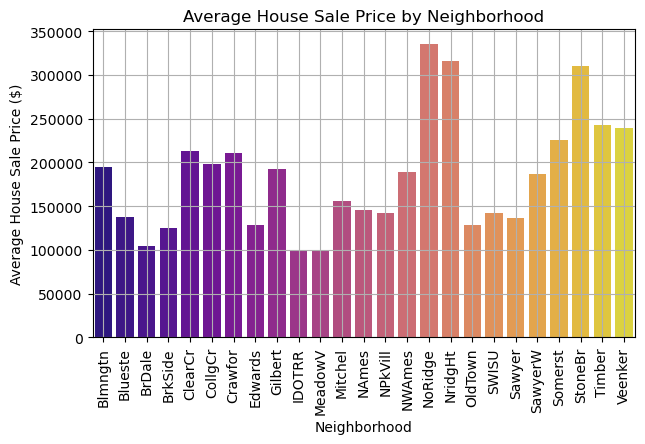

In [24]:
#bar plot of average SalePrice by Neighborhood
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_sale_price_by_neighborhood.index, y=avg_sale_price_by_neighborhood.values, palette='plasma')
plt.xlabel('Neighborhood')
plt.ylabel('Average House Sale Price ($)')
plt.title('Average House Sale Price by Neighborhood')
plt.xticks(rotation=90)  
plt.grid(True)
plt.savefig('../Results/salesPriceByNeighborhood.png')
plt.show()